In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/indian_liver_patient_cleaned.csv')

In [3]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
x = df.drop('Dataset', axis=1)
y = df['Dataset']

In [5]:
# splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### model selection

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score, make_scorer, roc_curve, auc
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

#### logistic regression

In [7]:
model_lr = LogisticRegression()

model_lr.fit(X_train, y_train)

print('Logistic Regression Classifier:')
print('Accuracy:', model_lr.score(X_test, y_test))
print('Precision:', precision_score(y_test, model_lr.predict(X_test)))
print('Recall:', recall_score(y_test, model_lr.predict(X_test)))
print('F-1 score:', f1_score(y_test, model_lr.predict(X_test)))

Logistic Regression Classifier:
Accuracy: 0.7280701754385965
Precision: 0.7755102040816326
Recall: 0.8941176470588236
F-1 score: 0.8306010928961749


In [8]:
cross_val_score(model_lr, x, y, cv=10).mean()

0.719412756028001

In [9]:
lg = LogisticRegression()
hyperparameters = {'C': np.logspace(-4, 4, 20),
                   'penalty' : ['l1', 'l2']}

gslg = GridSearchCV(lg, hyperparameters, cv=5, n_jobs=-1, verbose=2)

best_gslg = gslg.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.3s finished


In [41]:
best_gslg.best_estimator_

LogisticRegression(C=29.763514416313132, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
model_lr = LogisticRegression(C=29.763514416313132, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

model_lr.fit(X_train, y_train)

print('Logistic Regression Classifier:')
print('Accuracy:', model_lr.score(X_test, y_test))
print('Precision:', precision_score(y_test, model_lr.predict(X_test)))
print('Recall:', recall_score(y_test, model_lr.predict(X_test)))
print('F-1 score:', f1_score(y_test, model_lr.predict(X_test)))

Logistic Regression Classifier:
Accuracy: 0.7105263157894737
Precision: 0.776595744680851
Recall: 0.8588235294117647
F-1 score: 0.8156424581005587


In [43]:
cross_val_score(model_lr, x, y, cv=10).mean()

0.7071601417336445

#### random forest classifier

In [13]:
rfc = RandomForestClassifier(n_estimators=40)

rfc.fit(X_train, y_train)
print('Random Forest Classifier:')
print('Accuracy:', rfc.score(X_test, y_test))
print('Precision:', precision_score(y_test, rfc.predict(X_test)))
print('Recall:', recall_score(y_test, rfc.predict(X_test)))
print('F-1 score:', f1_score(y_test, rfc.predict(X_test)))

Random Forest Classifier:
Accuracy: 0.7807017543859649
Precision: 0.8191489361702128
Recall: 0.9058823529411765
F-1 score: 0.8603351955307263


In [14]:
rfc_ = RandomForestClassifier()
hyperparameters = {'n_estimators': [100, 200, 300, 1000],
                   'max_depth': [80, 90, 100, 110],
                   'min_samples_split': [2,10,20,40,80,100],
                   'min_samples_leaf': [2,10,20,40,80,100],
                   'max_features': [2, 3]}

gsrfc = GridSearchCV(rfc_, hyperparameters, cv=5, n_jobs=-1, verbose=2)

best_gsrfc = gsrfc.fit(X_train, y_train)

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 353 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 636 tasks      | elapsed:   48.1s
[Parallel(n_jobs=-1)]: Done 1001 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1446 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1973 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 2580 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 3269 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 4038 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 4889 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed:  7.4min finished


In [15]:
best_gsrfc.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=110, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [39]:
rfc = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=110, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

rfc.fit(X_train, y_train)
print('Random Forest Classifier:')
print('Accuracy:', rfc.score(X_test, y_test))
print('Precision:', precision_score(y_test, rfc.predict(X_test)))
print('Recall:', recall_score(y_test, rfc.predict(X_test)))
print('F-1 score:', f1_score(y_test, rfc.predict(X_test)))

Random Forest Classifier:
Accuracy: 0.7456140350877193
Precision: 0.7545454545454545
Recall: 0.9764705882352941
F-1 score: 0.8512820512820513


In [40]:
cross_val_score(rfc, x, y, cv=10).mean()

0.7105457609541095

#### KNN

In [19]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)
print('k-NN Classifier:')
print('Accuracy:', knn.score(X_test, y_test))
print('Precision:', precision_score(y_test, knn.predict(X_test)))
print('Recall:', recall_score(y_test, knn.predict(X_test)))
print('F-1 score:', f1_score(y_test, knn.predict(X_test)))

k-NN Classifier:
Accuracy: 0.6491228070175439
Precision: 0.7647058823529411
Recall: 0.7647058823529411
F-1 score: 0.7647058823529412


The optimal number of neighbors is 27


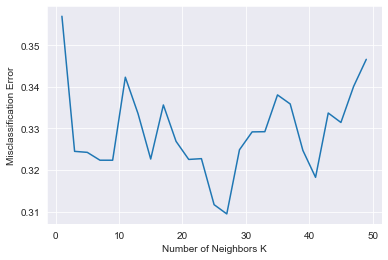

In [20]:
neighbors = list(range(1, 50, 2))
cv_scores = []

for k in neighbors:
    knn_t = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_t, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

mse = [1 - x for x in cv_scores]

optimal_k = neighbors[mse.index(min(mse))]
print('The optimal number of neighbors is {}'.format(optimal_k))

plt.plot(neighbors, mse)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [31]:
knn = KNeighborsClassifier(n_neighbors=27)

knn.fit(X_train, y_train)
print('k-NN Classifier:')
print('Accuracy:', knn.score(X_test, y_test))
print('Precision:', precision_score(y_test, knn.predict(X_test)))
print('Recall:', recall_score(y_test, knn.predict(X_test)))
print('F-1 score:', f1_score(y_test, knn.predict(X_test)))

k-NN Classifier:
Accuracy: 0.7105263157894737
Precision: 0.776595744680851
Recall: 0.8588235294117647
F-1 score: 0.8156424581005587


In [32]:
cross_val_score(KNeighborsClassifier(n_neighbors=27), x, y, cv=10, scoring='accuracy').mean()

0.7019553193328147

#### SVC

In [33]:
svm = SVC(gamma='auto', probability=True)

svm.fit(X_train, y_train)
print('SVC:')
print('Accuracy:', svm.score(X_test, y_test))
print('Precision:', precision_score(y_test, svm.predict(X_test)))
print('Recall:', recall_score(y_test, svm.predict(X_test)))
print('F-1 score:', f1_score(y_test, svm.predict(X_test)))

SVC:
Accuracy: 0.7456140350877193
Precision: 0.7456140350877193
Recall: 1.0
F-1 score: 0.8542713567839196


In [34]:
cross_val_score(svm, x, y, cv=10).mean()

0.7123325555267479

In [35]:
svc_ = SVC()

hyperparameters = {'C': [0.001, 0.01, 0.1, 1, 10],
                   'gamma' : [0.001, 0.01, 0.1, 1]}

gssvc = GridSearchCV(svc_, hyperparameters, cv=5, n_jobs=-1, verbose=2)

best_gssvc = gssvc.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.7s finished


In [36]:
best_gssvc.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [37]:
svm = SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

svm.fit(X_train, y_train)
print('SVC:')
print('Accuracy:', svm.score(X_test, y_test))
print('Precision:', precision_score(y_test, svm.predict(X_test)))
print('Recall:', recall_score(y_test, svm.predict(X_test)))
print('F-1 score:', f1_score(y_test, svm.predict(X_test)))

SVC:
Accuracy: 0.7192982456140351
Precision: 0.7676767676767676
Recall: 0.8941176470588236
F-1 score: 0.826086956521739


In [38]:
cross_val_score(svm, x, y, cv=10).mean()

0.7140880217785844

#### comparing model (after hyperparam tuning)

In [44]:
a = [['logistic regression',model_lr.score(X_test, y_test),precision_score(y_test, model_lr.predict(X_test)), recall_score(y_test, model_lr.predict(X_test)),f1_score(y_test, model_lr.predict(X_test)), cross_val_score(model_lr, x, y, cv=10).mean()],
     ['rfc', rfc.score(X_test, y_test),precision_score(y_test, rfc.predict(X_test)),recall_score(y_test, rfc.predict(X_test)),f1_score(y_test, rfc.predict(X_test)), cross_val_score(rfc, x, y, cv=10).mean()],
     ['knn', knn.score(X_test, y_test), precision_score(y_test, knn.predict(X_test)),recall_score(y_test, knn.predict(X_test)), f1_score(y_test, knn.predict(X_test)), cross_val_score(knn, x, y, cv=10).mean()],
     ['svc', svm.score(X_test, y_test), precision_score(y_test, svm.predict(X_test)),recall_score(y_test, svm.predict(X_test)), f1_score(y_test, svm.predict(X_test)), cross_val_score(svm, x, y, cv=10).mean()]
     ]

dfcompare = pd.DataFrame(a, columns=['model', 'Accuracy','Precision','Recall','F-1 score','Cross Val Score'])
dfcompare


,model,Accuracy,Precision,Recall,F-1 score,Cross Val Score
0,logistic regression,0.710526,0.776596,0.858824,0.815642,0.707160
1,rfc,0.745614,0.754545,0.976471,0.851282,0.722830
2,knn,0.710526,0.776596,0.858824,0.815642,0.701955
3,svc,0.719298,0.767677,0.894118,0.826087,0.714088


In [45]:
y.value_counts()

1    406
0    164
Name: Dataset, dtype: int64

Dari pengujian tersebut dan feature 'dataset' (disease or not) yang tidak seimbang (imbalance) saya memutuskan untuk memilih menggunakan random forest, karena nilai f-1 score-nya paling tinggi di antara model lainnya.

In [46]:
import pickle

pickle.dump(rfc, open('model_ilp', 'wb'))

In [47]:
loadModel = pickle.load(open('model_ilp', 'rb'))

In [48]:
loadModel

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=110, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)